# Evaluation: Precision & Recall
## Using the evaluation metrics we have learned, we are going to compare how well some different types of classifiers perform on different evaluation metrics
### We are going to use a dataset of written numbers which we can import from sklearn. Run the code below to do so. 


In [1]:
import numpy as np
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')
X, y = mnist['data'], mnist['target']

### Now take a look at the shapes of the X and y matricies 

In [2]:
print(y.shape)
print(X.shape)

(70000,)
(70000, 784)


### Now, let's pick one entry and see what number is written. Use indexing to pick the 36000th digit

In [3]:
print(X[36000])

[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   4. 149. 255. 184.  12.   0.   0.   0.   0.   0.   0.
   0. 

### You can use the .reshape(28,28) function and plt.imshow() function with the parameters cmap = matplotlib.cm.binary, interpolation="nearest" to make a plot of the number. Be sure to import matplotlib!

In [4]:
import matplotlib.pyplot as plt

X_img = X[36000].reshape(28,28)

plt.imshow(X_img, cmap = plt.cm.binary, interpolation = 'nearest')
plt.show()


Bad key "text.kerning_factor" on line 4 in
/opt/miniconda3/envs/ironhack_env/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.2/matplotlibrc.template
or from the matplotlib source distribution


<Figure size 640x480 with 1 Axes>

### Use indexing to see if what the plot shows matches with the outcome of the 36000th index

In [5]:
y[36000]

'9'

### Now lets break into a test train split to run a classification. Instead of using sklearn, use indexing to select the first 60000 entries for the training, and the rest for training.

In [6]:
X_train = X[:3600]
y_train = y[:3600]

X_test = X[3600:]
y_test = y[3600:]

### We are going to make a two-class classifier, so lets restrict to just one number, for example 5s. Do this by defining a new y training and y testing sets for just the number 5

In [7]:
y_train=np.where(y_train!='5', 0, 5)
y_test=np.where(y_test!='5', 0, 5)
print(y_train)
print(y_test)

[5 0 0 ... 0 0 0]
[0 0 0 ... 0 5 0]


### Lets train a logistic regression to predict if a number is a 5 or not (remember to use the 'just 5s' y training set!)

In [9]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(X_train, y_train)

lr.predict(X_train)

/opt/miniconda3/envs/ironhack_env/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


array([5, 0, 0, ..., 0, 0, 0])

### Does the classifier predict correctly the 36000th digit we picked before?

In [10]:
lr.predict_proba(X_train)[36000]

###### yes the classifier said that is not a 5 with 99,7% of probability

import pandas as pd

df=pd.DataFrame(lr.predict_proba(X_train), columns=lr.classes_)
df.loc[36000]


IndexError: index 36000 is out of bounds for axis 0 with size 3600

### To make some comparisons, we are going to make a very dumb classifier, that never predicts 5s. Build the classifier with the code below, and call it using: never_5_clf = Never5Classifier()

In [11]:
from sklearn.base import BaseEstimator
class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

never_5_clf = Never5Classifier()

### Now lets fit and predict on the testing set using our never 5 Classifier

In [14]:
never_5_clf.fit(X_train, y_train)

never_5_clf.predict(X_train)

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]])

### Let's compare this to the Logistic Regression. Examine the confusion matrix, precision, recall, and f1_scores for each. What is the probability cutoff you are using to decide the classes?

In [18]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, roc_curve, roc_auc_score

print(accuracy_score(y_true=y_test, y_pred=never_5_clf.predict(X_test)))

accuracy_score(y_true=y_test, y_pred=lr.predict(X_test))

0.9097439759036144


0.9496084337349397

In [20]:
print(precision_score(y_true=y_test, y_pred=never_5_clf.predict(X_test),pos_label=5) )

precision_score(y_true=y_test, y_pred=lr.predict(X_test),pos_label=5)

0.0


/opt/miniconda3/envs/ironhack_env/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.7135710827819913

In [22]:
print(recall_score(y_true=y_test, y_pred=never_5_clf.predict(X_test),pos_label=5))

recall_score(y_true=y_test, y_pred=lr.predict(X_test),pos_label=5)

0.0


0.7378608376439179

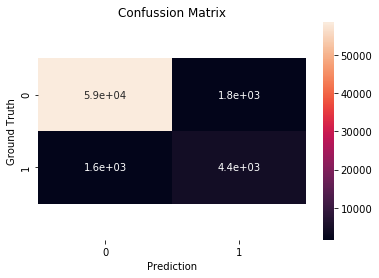

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

ax = sns.heatmap(confusion_matrix(y_true=y_test, y_pred=lr.predict(X_test)), annot=True)

b, t = ax.get_ylim()
ax.set_ylim(b + 0.5, t - 0.5)

plt.title('Confussion Matrix')
plt.ylabel('Ground Truth')
plt.xlabel('Prediction')
plt.show();

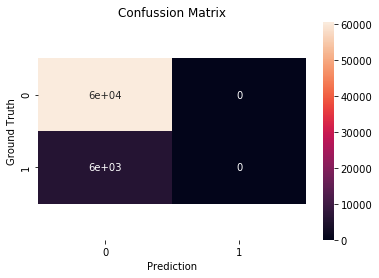

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

ax = sns.heatmap(confusion_matrix(y_true=y_test, y_pred=never_5_clf.predict(X_test)), annot=True)

b, t = ax.get_ylim()
ax.set_ylim(b + 0.5, t - 0.5)

plt.title('Confussion Matrix')
plt.ylabel('Ground Truth')
plt.xlabel('Prediction')
plt.show();

In [25]:
print(f1_score(y_true=y_test, y_pred=never_5_clf.predict(X_test),pos_label=5))

f1_score(y_true=y_test, y_pred=lr.predict(X_test),pos_label=5)

0.0


0.7255127153404429

### What are the differences you see? Without knowing what each model is, what can these metrics tell you about how well each works?

0.0


/opt/miniconda3/envs/ironhack_env/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.7135710827819913

### Now let's examine the roc_curve for each. Use the roc_curve method from sklearn.metrics to help plot the curve for each

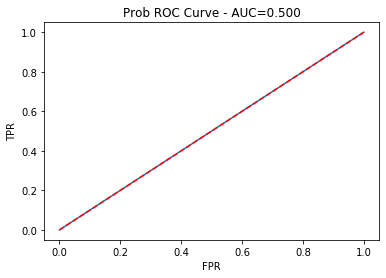

In [26]:
y_pred=never_5_clf.predict(X_test)


fpr, tpr, thresholds = roc_curve(y_test, y_pred,pos_label=5)
a = roc_auc_score(y_test, y_pred)
plt.plot(fpr, tpr)
plt.plot(fpr, fpr, 'r--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title(f'Prob ROC Curve - AUC={a:.3f}')
plt.show();

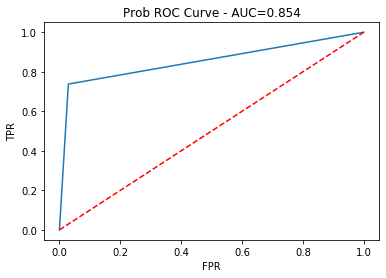

In [27]:
y_pred=lr.predict(X_test)


fpr, tpr, thresholds = roc_curve(y_test, y_pred,pos_label=5)
a = roc_auc_score(y_test, y_pred)
plt.plot(fpr, tpr)
plt.plot(fpr, fpr, 'r--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title(f'Prob ROC Curve - AUC={a:.3f}')
plt.show();

### Now find the roc_auc_score for each. 

In [28]:
y_pred=never_5_clf.predict(X_test)

print(roc_auc_score(y_test, y_pred))

y_pred=lr.predict(X_test)

roc_auc_score(y_test, y_pred)

0.5


0.8542384129286021

### What does this metric tell you? Which classifier works better with this metric in mind?